# Faizan Virani
# 4/23/2024
### Sentiment Analysis of Reviews - How good is the pizza in Chicago?
### Hypothesis: I believe the reviews will be mostly positive. I have had a lot of pizza in Chicago (it is my favorite food  to have there), and I have always loved it.

In [22]:
import requests
import yelpkeys #API key
import nltk
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

In [23]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

### Yelp Fusion API code

In [24]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'Pizza'
DEFAULT_LOCATION = 'Chicago, IL'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [25]:
response = search(API_KEY,DEFAULT_TERM, DEFAULT_LOCATION)

Querying https://api.yelp.com/v3/businesses/search ...


### Retrieves reviews

In [26]:
for business in response['businesses']:
    businessReview='/v3/businesses/{}/reviews'.format(business['id'])
    reviews = request(API_HOST,businessReview, API_KEY) #API Req
    for review in reviews['reviews']:
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity #sentiment analysis
        print(sentiment)

Querying https://api.yelp.com/v3/businesses/DXwSYgiXqIVNdO9dazel6w/reviews ...
0.7666666666666666
0.55625
0.3825
Querying https://api.yelp.com/v3/businesses/8vFJH_paXsMocmEO_KAa3w/reviews ...
0.36875
0.25
0.19166666666666665
Querying https://api.yelp.com/v3/businesses/Bxd9Y2PsdvIOGIKFQh53RQ/reviews ...
0.8333333333333334
0.08333333333333333
0.0
Querying https://api.yelp.com/v3/businesses/V11w-AksbQbNmvAnOizUWA/reviews ...
0.25
0.1
0.3666666666666667
Querying https://api.yelp.com/v3/businesses/QNbWTNuAEMWOurHN8rMXnA/reviews ...
-0.1625
0.25
0.16444444444444442
Querying https://api.yelp.com/v3/businesses/lng1ZrsRzCE9bA2MlMQPHQ/reviews ...
0.525
0.2604166666666667
0.6
Querying https://api.yelp.com/v3/businesses/wiNuegM8MNw9WIP0wfMmeA/reviews ...
0.26916666666666667
0.55
0.3
Querying https://api.yelp.com/v3/businesses/8-eWe05s8Z7I1AejHXNsEA/reviews ...
0.24000000000000002
0.07199999999999998
0.29409090909090907
Querying https://api.yelp.com/v3/businesses/Mud-L2vMAtmvWpjo3tDvaA/reviews ...


In [37]:
nltk.download('stopwords')
swrds = set(stopwords.words('english'))

#Default vals
ptb = 0
ntb = 0
neutraltb = 0
pnb = 0
nnb = 0
neutralnb = 0

wordCloud = [] #For word cloud later
for business in response['businesses']:
    reviews = request(API_HOST, '/v3/businesses/{}/reviews'.format(business['id']), API_KEY)
    for review in reviews['reviews']:
        analyzed = [word for word in TextBlob(review['text']).words if word.lower() not in swrds]
        wordCloud.append(' '.join(analyzed))
        sent = TextBlob(' '.join(analyzed)).sentiment.polarity #gets sentiment (tb)
        if sent > 0.05: ptb += 1
        elif sent < -0.05: ntb += 1
        else: neutraltb += 1
            
        sent = TextBlob(' '.join(analyzed), analyzer=NaiveBayesAnalyzer()).sentiment.classification #gets sentiment (nb)
        if sent == 'pos': pnb += 1
        elif sent == 'neg': nnb += 1
        else : neutralnb += 1
            

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolgl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Querying https://api.yelp.com/v3/businesses/DXwSYgiXqIVNdO9dazel6w/reviews ...
Querying https://api.yelp.com/v3/businesses/8vFJH_paXsMocmEO_KAa3w/reviews ...
Querying https://api.yelp.com/v3/businesses/Bxd9Y2PsdvIOGIKFQh53RQ/reviews ...
Querying https://api.yelp.com/v3/businesses/V11w-AksbQbNmvAnOizUWA/reviews ...
Querying https://api.yelp.com/v3/businesses/QNbWTNuAEMWOurHN8rMXnA/reviews ...
Querying https://api.yelp.com/v3/businesses/lng1ZrsRzCE9bA2MlMQPHQ/reviews ...
Querying https://api.yelp.com/v3/businesses/wiNuegM8MNw9WIP0wfMmeA/reviews ...
Querying https://api.yelp.com/v3/businesses/8-eWe05s8Z7I1AejHXNsEA/reviews ...
Querying https://api.yelp.com/v3/businesses/Mud-L2vMAtmvWpjo3tDvaA/reviews ...
Querying https://api.yelp.com/v3/businesses/K_rdigDLXDYoyCjerZLQsg/reviews ...
Querying https://api.yelp.com/v3/businesses/cxAkuwv7p4gm4Coixw7h9A/reviews ...
Querying https://api.yelp.com/v3/businesses/Xh5vGcoKk-SaBw7GUZDFxg/reviews ...
Querying https://api.yelp.com/v3/businesses/GSJIjwyZ

### Paint TextBlob Donut chart

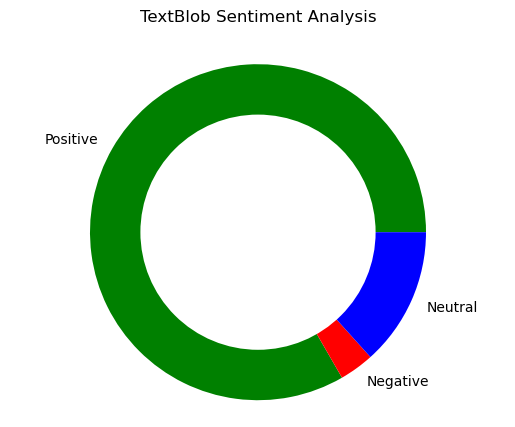

In [38]:
fig, ax = plt.subplots()
wedges, autotexts = ax.pie([ptb, ntb, neutraltb], labels=["Positive", "Negative", "Neutral"], colors=['green', 'red', 'blue'], wedgeprops={'width': 0.4})
ax.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white') #turns pie chart into donut
fig.gca().add_artist(centre_circle)
ax.set_title('TextBlob Sentiment Analysis\n')
plt.show()

### Print NaveBayes Donut Graph

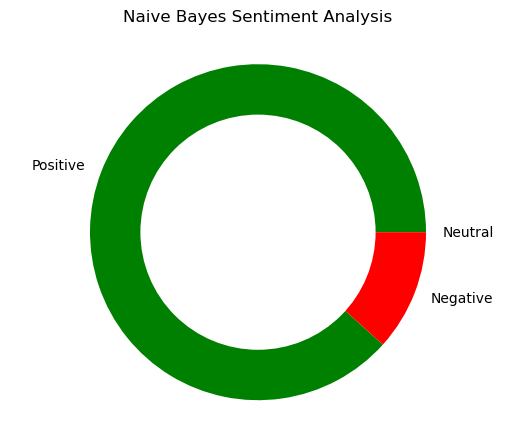

In [39]:
fig, ax = plt.subplots()
wedges, autotexts = ax.pie([pnb, nnb, neutralnb], labels=["Positive", "Negative", "Neutral"], colors=['green', 'red', 'blue'], wedgeprops={'width': 0.4})
ax.axis('equal')
centre_circle = plt.Circle((0,0),0.70,fc='white') #pie chart --> donut
fig.gca().add_artist(centre_circle)
ax.set_title('Naive Bayes Sentiment Analysis\n')
plt.show()

### In conclusion, it seems like Chicago has amazing pizza. The reviews are overwhelmingly positive on both the TextBlob analysis and the NaiveBayesAnalyzer analysis. 

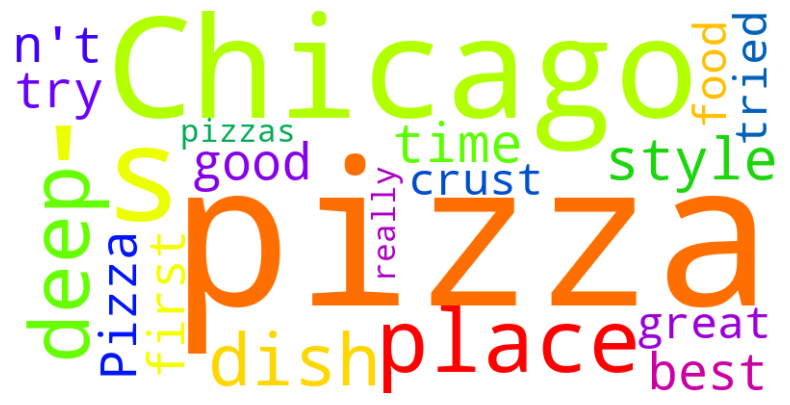

In [41]:
def generate_wordcloud(review_texts):
    words = ' '.join(review_texts)
    wordFreq = Counter(words.split())
    wordCloud = WordCloud(width=800, height=400, background_color='white', colormap='prism', max_words=20) #generate word cloud with word cloud package
    wordCloud.generate_from_frequencies(wordFreq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate the word cloud
generate_wordcloud(wordCloud)